In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## [gene1, gene2, .., gene13, rRNA1, rRNA2]

## Reactions
# Productions
p1 = np.ones(15)
p1[12] = 0
p2 = np.zeros(15)
p2[12] = 1
v = [p1, p2]

# Degradation
d = []
for i in range(15):
    z = np.zeros(15)
    z[i] = -1
    d.append(z)
v += d

In [3]:
## Coefficient of Rates
p_rate = 100
d_rate_coef = 5

c = []
for i in range(2):
    c.append(p_rate)
for i in range(13):
    c.append(d_rate_coef)
for i in range(2):
    c.append(d_rate_coef / 3)

print(c)

[100, 100, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1.6666666666666667, 1.6666666666666667]


In [4]:
## Initial Values
x = np.zeros(15)

In [5]:
# Time Limit
t_max = 20
t = 0
t_list = [0]

a = np.zeros(17)
result = [x]
while t < t_max:
    # Propensity Function
    for i in range(2):
        a[i] = c[i]
    for i in range(2, 17):
        a[i] = c[i] * x[i - 2]
    a_sum = sum(a)
    
    # Next Reaction Index
    r1 = random.random()    
    a_sum1 = 0
    for j in range(17):
        a_sum1 += a[j]
        if a_sum1 / a_sum > r1:
            break
    x = x + v[j]
    result.append(x)
    
    # Time until next reaction
    r2 = random.random()
    tau = np.log(1 / r2) / a_sum
    t += tau
    t_list.append(t)
    
    # print(x, a, t)

In [6]:
result

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.]),
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2.]),
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 0., 2., 2.]),
 array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 0., 3., 3.]),
 array([3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 2., 0., 3., 3.]),
 array([3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 2., 1., 3., 3.]),
 array([4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 3., 1., 4., 4.]),
 array([4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 2., 1., 4., 4.]),
 array([5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 3., 1., 5., 5.]),
 array([5., 5., 5., 5., 5., 5., 4., 4., 5., 5., 5., 3., 1., 5., 5.]),
 array([6., 6., 6., 6., 6., 6., 5., 5., 6., 6., 6., 4., 1., 6., 6.]),
 array([6., 6., 6., 6., 6., 6., 5., 4., 6., 6., 6., 4., 1., 6., 6.]),
 array([6., 6., 6., 5., 6., 6., 5., 4., 6., 6., 6., 4., 1., 6., 6.]),
 array([7., 7., 7., 

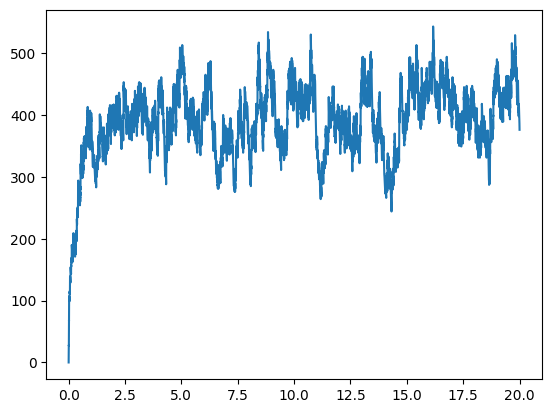

In [7]:
rn = np.array([sum(r) for r in result])
plt.plot(t_list, rn)
plt.show()

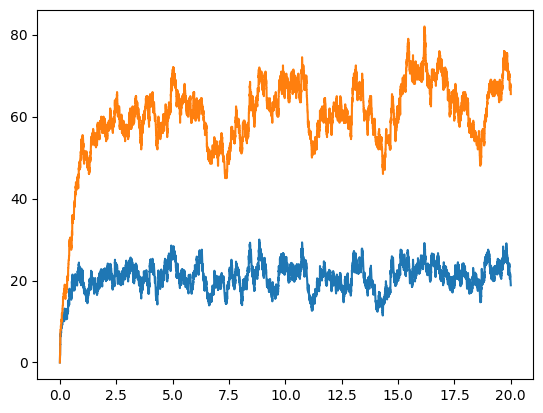

In [8]:
rn1 = np.array([sum(r[0:13]) / 13 for r in result])
rn2 = np.array([sum(r[13:15]) / 2 for r in result])
plt.plot(t_list, rn1)
plt.plot(t_list, rn2)
plt.show()

In [9]:
def Gillespie(t_max, x_ini, coef, reaction):
    t = 0
    t_list = [0]

    a = np.zeros(17)
    result = [x_ini]
    x = x_ini
    while t < t_max:
        # Propensity Function
        for i in range(2):
            a[i] = c[i]
        for i in range(2, 17):
            a[i] = c[i] * x[i - 2]
        a_sum = sum(a)
        
        # Next Reaction Index
        r1 = random.random()    
        a_sum1 = 0
        for j in range(17):
            a_sum1 += a[j]
            if a_sum1 / a_sum > r1:
                break
        x = x + v[j]
        result.append(x)
        
        # Time until next reaction
        r2 = random.random()
        tau = np.log(1 / r2) / a_sum
        t += tau
        t_list.append(t)
        
    return(t_list, result)

In [10]:
def index(t, t_list):
    ind, = np.where(t_list == t)
    if ind.size == 0:
        t_list = np.sort(np.append(t_list, t))
        ind, = np.where(t_list == t)
    return(ind[0])

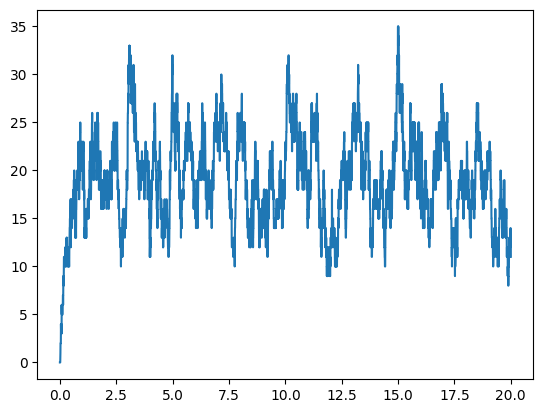

In [11]:
t_list, result = Gillespie(t_max = 20, x_ini = np.zeros(15), coef = c, reaction = v)
rn = np.array([r[0] for r in result])
plt.plot(t_list, rn)
plt.show()

In [12]:
t_lists = np.array([])
results = np.array([])
for i in range(10):
    t_list, result = Gillespie(t_max = 20, x_ini = np.zeros(15), coef = c, reaction = v)
    t_lists = np.append(t_lists, t_list)
    results = np.append(results, result)